In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("cleaned_billionaires.csv")

In [3]:
# Group the data by 'year' and calculate the total wealth for each year
yearly_wealth = data.groupby('year')['wealth.worth in billions'].sum().reset_index()
print(yearly_wealth)

   year  wealth.worth in billions
0  1996                     934.7
1  2001                    1710.1
2  2014                    6407.4


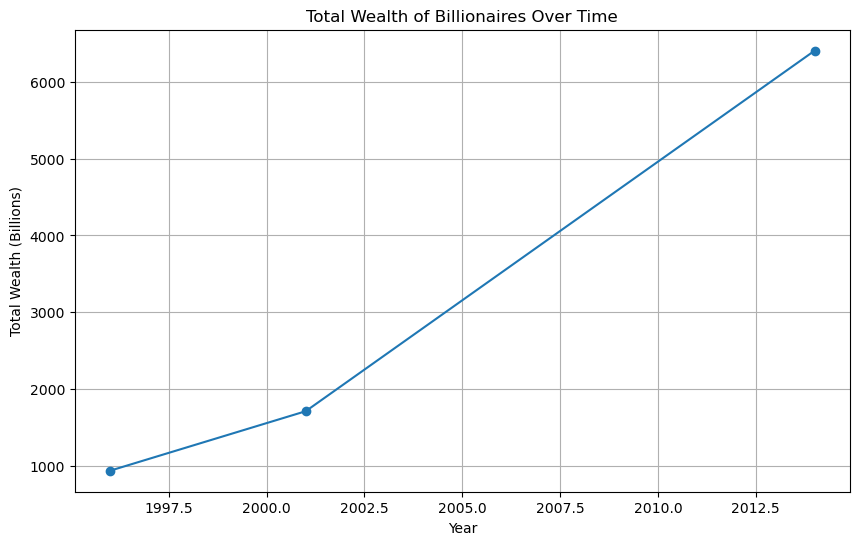

In [4]:
# Group the data by 'year' and calculate the total wealth for each year
yearly_wealth = data.groupby('year')['wealth.worth in billions'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_wealth['year'], yearly_wealth['wealth.worth in billions'], marker='o', linestyle='-')
plt.title('Total Wealth of Billionaires Over Time')
plt.xlabel('Year')
plt.ylabel('Total Wealth (Billions)')
plt.grid(True)

plt.show()

#### Yearly Analysis

##### Identify the highest and lowest years in terms of total billionaire wealth

In [5]:
yearly_wealth = data.groupby('year')['wealth.worth in billions'].sum().reset_index()

In [6]:
# Find the Highest and Lowest Years
highest_year = yearly_wealth.loc[yearly_wealth['wealth.worth in billions'].idxmax()]
lowest_year = yearly_wealth.loc[yearly_wealth['wealth.worth in billions'].idxmin()]

In [7]:
print("Highest Year in Terms of Total Billionaire Wealth:")
print(highest_year)

print("\nLowest Year in Terms of Total Billionaire Wealth:")
print(lowest_year)

Highest Year in Terms of Total Billionaire Wealth:
year                        2014.0
wealth.worth in billions    6407.4
Name: 2, dtype: float64

Lowest Year in Terms of Total Billionaire Wealth:
year                        1996.0
wealth.worth in billions     934.7
Name: 0, dtype: float64


##### Identify outlier years with unusual wealth accumulation or losses

In [8]:
yearly_wealth['wealth_change'] = yearly_wealth['wealth.worth in billions'].diff()

In [9]:
# Identify Outlier Years
# Calculate the IQR
Q1 = yearly_wealth['wealth_change'].quantile(0.25)
Q3 = yearly_wealth['wealth_change'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find outlier years
outlier_years = yearly_wealth[(yearly_wealth['wealth_change'] > upper_bound) | (yearly_wealth['wealth_change'] < lower_bound)]

# Display outlier years and their wealth changes
print("Outlier Years with Unusual Wealth Changes:")
print(outlier_years)

Outlier Years with Unusual Wealth Changes:
Empty DataFrame
Columns: [year, wealth.worth in billions, wealth_change]
Index: []


#### Segmentation

In [10]:
# Group the data by 'year' and 'location.region,' calculating the total wealth for each region and year.
yearly_region_wealth = data.groupby(['year', 'location.region'])['wealth.worth in billions'].sum().reset_index()

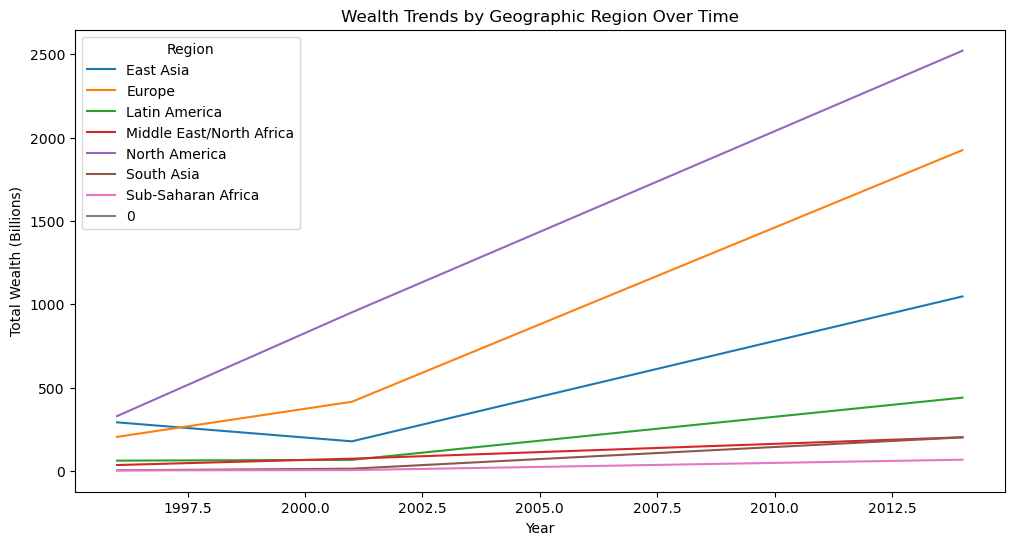

In [11]:
# Create a line chart or stacked bar chart to visualize wealth trends by region over time.
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='wealth.worth in billions', hue='location.region', data=yearly_region_wealth)
plt.title('Wealth Trends by Geographic Region Over Time')
plt.xlabel('Year')
plt.ylabel('Total Wealth (Billions)')
plt.legend(title='Region')
plt.show()

#### Statistical Analysis

In [12]:
yearly_wealth = data.groupby('year')['wealth.worth in billions'].sum().reset_index()

In [13]:
# Calculate the mean, median, and standard deviation of total wealth for each year
mean_wealth = yearly_wealth['wealth.worth in billions'].mean()
median_wealth = yearly_wealth['wealth.worth in billions'].median()
std_dev_wealth = yearly_wealth['wealth.worth in billions'].std()

# Display the summary statistics
print("Summary Statistics of Total Billionaire Wealth Over Time:")
print("Mean Wealth:", mean_wealth)
print("Median Wealth:", median_wealth)
print("Standard Deviation of Wealth:", std_dev_wealth)

Summary Statistics of Total Billionaire Wealth Over Time:
Mean Wealth: 3017.4
Median Wealth: 1710.1
Standard Deviation of Wealth: 2961.3149596083153


In [14]:
import scipy.stats as stats

# Select data for the two samples
wealth_2014 = data[data['year'] == 2014]['wealth.worth in billions']
wealth_2001 = data[data['year'] == 2001]['wealth.worth in billions']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(wealth_2014, wealth_2001)

# Set the significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The means are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means are not significantly different.")

Reject the null hypothesis. The means are significantly different.


#### Patterns or trends in wealth growth over time by region or sector

##### Wealth Growth by Region

In [19]:
# Group the data by 'year' and 'location.region', calculate total wealth for each group
region_wealth = data.groupby(['year', 'location.region'])['wealth.worth in billions'].sum().reset_index()
region_wealth

,year,location.region,wealth.worth in billions
0,1996,East Asia,292.3
1,1996,Europe,205.1
2,1996,Latin America,62.6
3,1996,Middle East/North Africa,36.2
4,1996,North America,329.7
5,1996,South Asia,4.7
6,1996,Sub-Saharan Africa,4.1
7,2001,0,2.1
8,2001,East Asia,178.4
9,2001,Europe,415.7


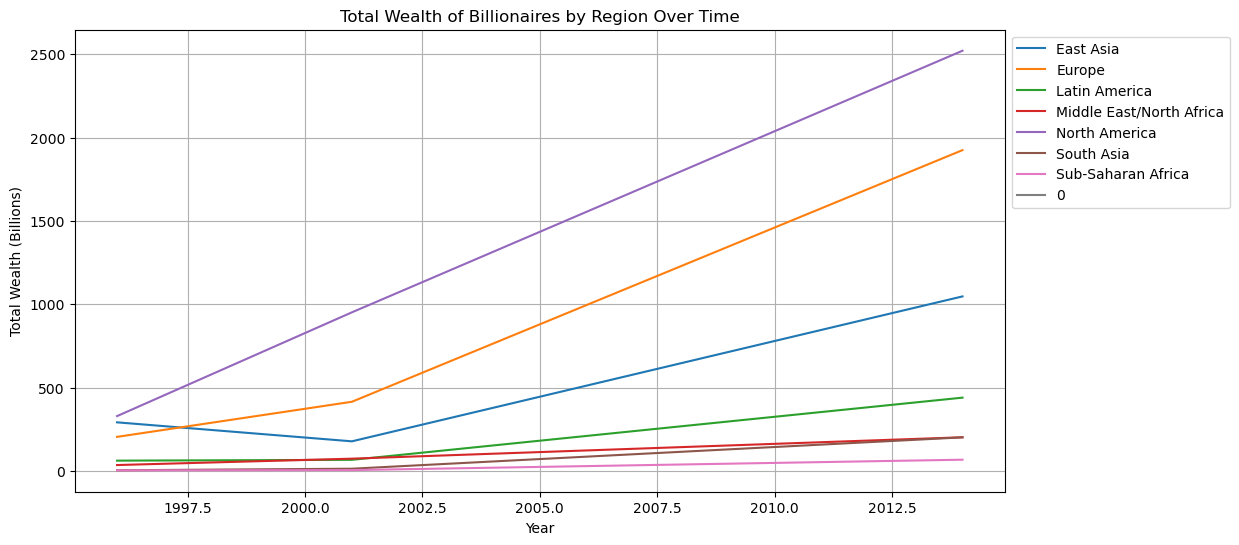

In [17]:
# Group the data by 'year' and 'location.region', calculate total wealth for each group
region_wealth = data.groupby(['year', 'location.region'])['wealth.worth in billions'].sum().reset_index()

# Create a line chart for each region
regions = region_wealth['location.region'].unique()

plt.figure(figsize=(12, 6))

for region in regions:
    region_data = region_wealth[region_wealth['location.region'] == region]
    plt.plot(region_data['year'], region_data['wealth.worth in billions'], label=region)

plt.title('Total Wealth of Billionaires by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Total Wealth (Billions)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

##### Wealth Growth by Sector

In [18]:
# Group the data by 'year' and 'company.sector', calculate total wealth for each group
sector_wealth = data.groupby(['year', 'company.sector'])['wealth.worth in billions'].sum().reset_index()
sector_wealth

,year,company.sector,wealth.worth in billions
0,1996,Oil refining,2.0
1,1996,Communications,6.1
2,1996,Finance,16.2
3,1996,Oil refining,2.0
4,1996,Software,18.5
...,...,...,...
820,2014,wine and spirits,3.3
821,2014,winter jackets,1.4
822,2014,wireless products,2.7
823,2014,wrestling promotion,1.2


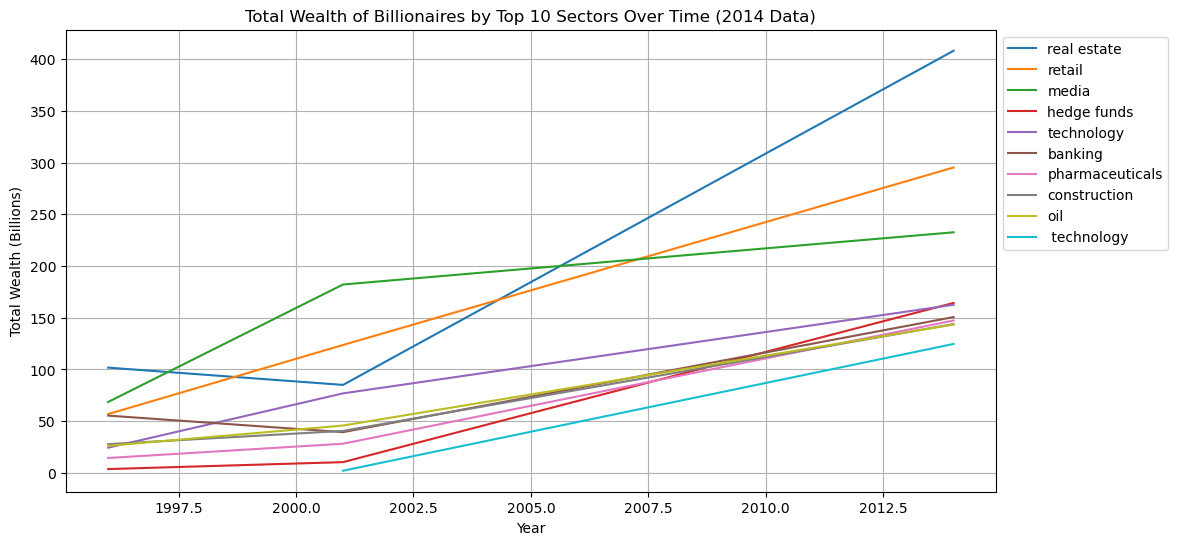

In [21]:
# Group the data by 'year' and 'company.sector', calculate total wealth for each group
sector_wealth = data.groupby(['year', 'company.sector'])['wealth.worth in billions'].sum().reset_index()

# Find the top 10 sectors with the highest total wealth in the most recent year (2014)
top_10_sectors_2014 = sector_wealth[sector_wealth['year'] == 2014].nlargest(10, 'wealth.worth in billions')

# Create bar charts for the top 10 sectors
plt.figure(figsize=(12, 6))
for sector in top_10_sectors_2014['company.sector']:
    sector_data = sector_wealth[sector_wealth['company.sector'] == sector]
    plt.plot(sector_data['year'], sector_data['wealth.worth in billions'], label=sector)

plt.title('Total Wealth of Billionaires by Top 10 Sectors Over Time (2014 Data)')
plt.xlabel('Year')
plt.ylabel('Total Wealth (Billions)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [22]:
# Group the data by 'year' and 'company.sector', calculate total wealth for each group
sector_wealth = data.groupby(['year', 'company.sector'])['wealth.worth in billions'].sum().reset_index()

# Find the top 10 sectors with the highest total wealth in the most recent year (2014)
top_10_sectors_2014 = sector_wealth[sector_wealth['year'] == 2014].nlargest(10, 'wealth.worth in billions')

# Filter the data to include only the top 10 sectors
sector_wealth_top_10 = sector_wealth[sector_wealth['company.sector'].isin(top_10_sectors_2014['company.sector'])]
sector_wealth_top_10

,year,company.sector,wealth.worth in billions
25,1996,banking,55.3
52,1996,construction,27.7
88,1996,hedge funds,3.6
103,1996,media,68.5
112,1996,oil,26.1
120,1996,pharmaceuticals,14.3
125,1996,real estate,101.7
128,1996,retail,56.8
138,1996,technology,24.3
169,2001,technology,2.0


#### Comparing Regions and Sectors

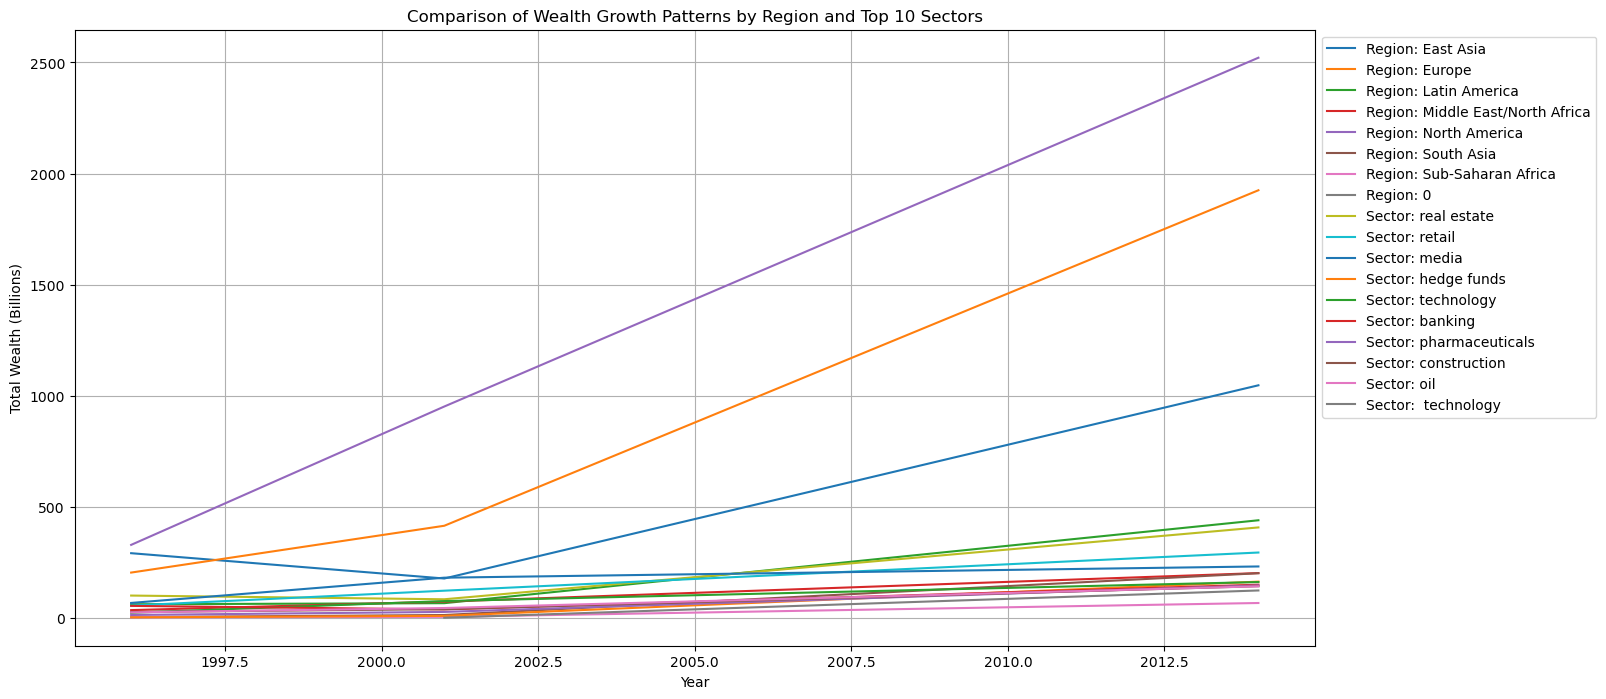

In [24]:
# Group the data by 'year' and 'location.region', calculate total wealth for each group
region_wealth = data.groupby(['year', 'location.region'])['wealth.worth in billions'].sum().reset_index()

# Find the top 10 sectors with the highest total wealth in the most recent year (2014)
top_10_sectors_2014 = sector_wealth[sector_wealth['year'] == 2014].nlargest(10, 'wealth.worth in billions')

# Filter the data to include only the top 10 sectors
sector_wealth_top_10 = sector_wealth[sector_wealth['company.sector'].isin(top_10_sectors_2014['company.sector'])]

# Create line charts for both regions and sectors side by side
plt.figure(figsize=(16, 8))

# Plot regions
regions = region_wealth['location.region'].unique()
for region in regions:
    region_data = region_wealth[region_wealth['location.region'] == region]
    plt.plot(region_data['year'], region_data['wealth.worth in billions'], label=f"Region: {region}")

# Plot sectors
for sector in top_10_sectors_2014['company.sector']:
    sector_data = sector_wealth_top_10[sector_wealth_top_10['company.sector'] == sector]
    plt.plot(sector_data['year'], sector_data['wealth.worth in billions'], label=f"Sector: {sector}")

plt.title('Comparison of Wealth Growth Patterns by Region and Top 10 Sectors')
plt.xlabel('Year')
plt.ylabel('Total Wealth (Billions)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

##### Statistical Analysis

In [25]:
# Calculate wealth change for each region
region_wealth_change = data.groupby(['location.region', 'year'])['wealth.worth in billions'].sum().diff().reset_index()

# Calculate wealth change for each sector
sector_wealth_change = data.groupby(['company.sector', 'year'])['wealth.worth in billions'].sum().diff().reset_index()

# Calculate summary statistics for regions
region_summary_statistics = region_wealth_change.groupby('location.region')['wealth.worth in billions'].agg(['mean', 'median', 'std']).reset_index()

# Calculate summary statistics for sectors
sector_summary_statistics = sector_wealth_change.groupby('company.sector')['wealth.worth in billions'].agg(['mean', 'median', 'std']).reset_index()

# Print the results
print("Summary Statistics for Regions:")
print(region_summary_statistics)

print("\nSummary Statistics for Sectors:")
print(sector_summary_statistics)

Summary Statistics for Regions:
            location.region        mean  median          std
0                         0         NaN     NaN          NaN
1                 East Asia  348.500000   290.2   494.136186
2                    Europe  292.466667   210.6  1178.035408
3             Latin America -494.866667     4.8  1198.542187
4  Middle East/North Africa  -79.200000    38.2   285.048698
5             North America  772.800000   622.4   732.768947
6                South Asia -773.000000     9.5  1512.550743
7        Sub-Saharan Africa  -44.666667     1.7   136.299168

Summary Statistics for Sectors:
          company.sector       mean  median        std
0           Oil refining  25.300000    25.3  34.082547
1         Communications   6.466667     4.7  53.871730
2                Finance  -4.233333    21.1  44.660310
3           Oil refining  -6.433333     1.2  47.512139
4               Software  12.000000    17.3  31.189582
..                   ...        ...     ...        ...
5